### Data Source 
https://www.kaggle.com/datasets/bwandowando/rotten-tomatoesall-time-best-super-hero-movies

### Regression Model
Model is built to predict the rotten tomato rank of the movie based on the features.

### Approach:
* Taking three datasets from the above source and merging them into one dataset.
* Cleaning the data.
* Performing EDA.
* Building a model to predict the rotten tomato rank of the movie based on the features.
* Evaluating the model.



Importing the necessary libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import OrdinalEncoder

Importing CSV files

In [2]:
df_movies = pd.read_csv(r'movies.csv')
df_critics = pd.read_csv(r'critic_reviews.csv')
df_user_reviews = pd.read_csv(r'user_reviews.csv')

Previewing the data

In [3]:
df_movies.head()

,movieId,movieTitle,movieYear,movieURL,movieRank,critic_score,audience_score
0,4517f650-c60a-4edc-b37e-9236213c2b93,Spider-Man: Into the Spider-Verse,2018,https://www.rottentomatoes.com/m/spider_man_in...,1,97%,94%
1,9ddacc49-1918-3722-b5d9-4a1fa6b9b2a3,The Incredibles,2004,https://www.rottentomatoes.com/m/the_incredibles,2,97%,75%
2,e1374d4d-19b0-31b2-a6cc-c4189f2b27ca,Black Panther,2018,https://www.rottentomatoes.com/m/black_panther...,3,96%,79%
3,27539355-4940-4c29-aaab-d3fe4dafa4ee,Spider-Man: Across the Spider-Verse,2023,https://www.rottentomatoes.com/m/spider_man_ac...,4,95%,94%
4,2da44bd6-2a22-3238-a139-a40ab1769550,Teenage Mutant Ninja Turtles: Mutant Mayhem,2023,https://www.rottentomatoes.com/m/teenage_mutan...,5,95%,90%


In [5]:
df_critics.head()

,reviewId,creationDate,criticName,criticPageUrl,reviewState,isFresh,isRotten,isRtUrl,isTopCritic,publicationUrl,publicationName,reviewUrl,quote,scoreSentiment,originalScore,movieId
0,1912176,1966-07-30,Jennie Kermode,/critics/jennie-kermode,fresh,True,False,False,False,/critics/source/1869,Eye for Film,http://www.eyeforfilm.co.uk/reviews.php?id=7898,NaN,POSITIVE,4/5,7602d2ab-c9bc-3439-9cd6-d3a06e81728e
1,1895073,1998-08-21,Scott Nash,/critics/scott-nash,fresh,True,False,False,False,/critics/source/1465,Three Movie Buffs,http://www.threemoviebuffs.com/review/blade,It's stylish and fast-paced. It's also a lot o...,POSITIVE,3/4,4128b2f6-8c69-396a-a83d-0d44eb90e5f7
2,25507,2000-01-01,Roger Ebert,/critics/roger-ebert,fresh,True,False,False,True,/critics/source/67,Chicago Sun-Times,http://www.rogerebert.com/reviews/the-rocketee...,"You have to dial down, to return to an age of ...",POSITIVE,3/4,01935e47-e735-30c3-b8bd-72a9dbbcfa8a
3,25508,2000-01-01,NaN,NaN,rotten,False,True,False,True,/critics/source/148,Empire Magazine,http://www.empireonline.com/reviews/reviewcomp...,Reaches for the skies but runs out of fuel.,NEGATIVE,2/5,01935e47-e735-30c3-b8bd-72a9dbbcfa8a
4,25509,2000-01-01,Joe Brown,/critics/joe-brown,fresh,True,False,False,True,/critics/source/474,Washington Post,http://www.washingtonpost.com/wp-srv/style/lon...,"Based on a comic book, deliciously corny but n...",POSITIVE,NaN,01935e47-e735-30c3-b8bd-72a9dbbcfa8a


Checking for imbalanced data

In [7]:
df_critics['publicationName'].value_counts()

publicationName
eFilmCritic.com              144
Washington Post              104
Reeling Reviews              100
Time Out                     100
New York Times                98
                            ... 
Night Vision                   1
Culture Trip                   1
Blunt Magazine                 1
Bust Magazine                  1
Fort Worth Business Press      1
Name: count, Length: 1755, dtype: int64

Grouping the publications into quantiles based on popularity.

In [8]:
# Calculate the value counts
value_counts = df_critics['publicationName'].value_counts()

# Determine the quantile thresholds
quantiles = pd.qcut(value_counts, 4, labels=['1', '2', '3', '4'])

# Create a mapping from publicationName to quantile group
quantile_mapping = quantiles.to_dict()

# Map the publicationName to its quantile group
df_critics['publicationGroup'] = df_critics['publicationName'].map(quantile_mapping)

# Display the first few rows to verify the new column
print(df_critics.head())

   reviewId creationDate      criticName            criticPageUrl reviewState  \
0   1912176   1966-07-30  Jennie Kermode  /critics/jennie-kermode       fresh   
1   1895073   1998-08-21      Scott Nash      /critics/scott-nash       fresh   
2     25507   2000-01-01     Roger Ebert     /critics/roger-ebert       fresh   
3     25508   2000-01-01             NaN                      NaN      rotten   
4     25509   2000-01-01       Joe Brown       /critics/joe-brown       fresh   

   isFresh  isRotten isRtUrl  isTopCritic        publicationUrl  \
0     True     False   False        False  /critics/source/1869   
1     True     False   False        False  /critics/source/1465   
2     True     False   False         True    /critics/source/67   
3    False      True   False         True   /critics/source/148   
4     True     False   False         True   /critics/source/474   

     publicationName                                          reviewUrl  \
0       Eye for Film    http://www.

In [9]:
quantile_mapping

{'eFilmCritic.com': '4',
 'Washington Post': '4',
 'Reeling Reviews': '4',
 'Time Out': '4',
 'New York Times': '4',
 'Guardian': '4',
 'Espinof': '4',
 'Variety': '4',
 'Empire Magazine': '4',
 'ComingSoon.net': '4',
 'Kaplan vs. Kaplan': '4',
 'Austin Chronicle': '4',
 'Cinema Crazed': '4',
 'ReelViews': '4',
 'Hollywood Reporter': '4',
 'Entertainment Weekly': '4',
 'Los Angeles Times': '4',
 'Laramie Movie Scope': '4',
 'Forbes': '4',
 "One Guy's Opinion": '4',
 'Boston Globe': '4',
 'Chicago Reader': '4',
 'Chicago Tribune': '4',
 'Globe and Mail': '4',
 'Film Threat': '4',
 'Slant Magazine': '4',
 'Common Sense Media': '4',
 'Daily Express (UK)': '4',
 'Gone With The Twins': '4',
 "JoBlo's Movie Network": '4',
 'Rolling Stone': '4',
 'IGN Movies': '4',
 'Reel Film Reviews': '4',
 'New York Post': '4',
 'CinemaBlend': '4',
 'Aisle Seat': '4',
 'Chicago Sun-Times': '4',
 'San Francisco Chronicle': '4',
 'PopMatters': '4',
 'Detroit News': '4',
 'Flickering Myth': '4',
 'Associated 

In [10]:
df_critics.head(20)

,reviewId,creationDate,criticName,criticPageUrl,reviewState,isFresh,isRotten,isRtUrl,isTopCritic,publicationUrl,publicationName,reviewUrl,quote,scoreSentiment,originalScore,movieId,publicationGroup
0,1912176,1966-07-30,Jennie Kermode,/critics/jennie-kermode,fresh,True,False,False,False,/critics/source/1869,Eye for Film,http://www.eyeforfilm.co.uk/reviews.php?id=7898,NaN,POSITIVE,4/5,7602d2ab-c9bc-3439-9cd6-d3a06e81728e,3
1,1895073,1998-08-21,Scott Nash,/critics/scott-nash,fresh,True,False,False,False,/critics/source/1465,Three Movie Buffs,http://www.threemoviebuffs.com/review/blade,It's stylish and fast-paced. It's also a lot o...,POSITIVE,3/4,4128b2f6-8c69-396a-a83d-0d44eb90e5f7,4
2,25507,2000-01-01,Roger Ebert,/critics/roger-ebert,fresh,True,False,False,True,/critics/source/67,Chicago Sun-Times,http://www.rogerebert.com/reviews/the-rocketee...,"You have to dial down, to return to an age of ...",POSITIVE,3/4,01935e47-e735-30c3-b8bd-72a9dbbcfa8a,4
3,25508,2000-01-01,NaN,NaN,rotten,False,True,False,True,/critics/source/148,Empire Magazine,http://www.empireonline.com/reviews/reviewcomp...,Reaches for the skies but runs out of fuel.,NEGATIVE,2/5,01935e47-e735-30c3-b8bd-72a9dbbcfa8a,4
4,25509,2000-01-01,Joe Brown,/critics/joe-brown,fresh,True,False,False,True,/critics/source/474,Washington Post,http://www.washingtonpost.com/wp-srv/style/lon...,"Based on a comic book, deliciously corny but n...",POSITIVE,NaN,01935e47-e735-30c3-b8bd-72a9dbbcfa8a,4
5,25510,2000-01-01,Hal Hinson,/critics/hal-hinson,rotten,False,True,False,True,/critics/source/474,Washington Post,http://www.washingtonpost.com/wp-srv/style/lon...,"It's a humble little item, actually, easily di...",NEGATIVE,NaN,01935e47-e735-30c3-b8bd-72a9dbbcfa8a,4
6,25516,2000-01-01,Steve Rhodes,/critics/steve-rhodes,rotten,False,True,False,False,/critics/source/703,Internet Reviews,http://reviews.imdb.com/Reviews/77/7795,The problem with the film is that it is nothin...,NEGATIVE,2/4,01935e47-e735-30c3-b8bd-72a9dbbcfa8a,4
7,25518,2000-01-01,James O'Ehley,/critics/james-oehley,rotten,False,True,False,False,/critics/source/1819,Sci-Fi Movie Page,http://www.scifimoviepage.com/rocket.html,"Okay special effects, but the story tends to d...",NEGATIVE,2.5/4,01935e47-e735-30c3-b8bd-72a9dbbcfa8a,4
8,25519,2000-01-01,Marc Savlov,/critics/marc-savlov,fresh,True,False,False,True,/critics/source/28,Austin Chronicle,http://www.austinchronicle.com/gyrobase/Calend...,"Such an idealized time never really existed, t...",POSITIVE,3.5/5,01935e47-e735-30c3-b8bd-72a9dbbcfa8a,4
9,25525,2000-01-01,Chris Hicks,/critics/chris-hicks,rotten,False,True,False,False,/critics/source/121,Deseret News (Salt Lake City),http://www.deseretnews.com/article/700001558/T...,".. has its exciting and amusing moments, but o...",NEGATIVE,NaN,01935e47-e735-30c3-b8bd-72a9dbbcfa8a,4


In [11]:
df_user_reviews.head()

,movieId,rating,quote,reviewId,isVerified,isSuperReviewer,hasSpoilers,hasProfanity,score,creationDate,userDisplayName,userRealm,userId
0,13905397-4673-3e05-954d-8840645bebc2,1.0,"Did.Not.Like.\n\nThis movie was boring, overse...",NaN,False,False,False,False,1.0,2001-03-07,NaN,RT,901245019
1,13905397-4673-3e05-954d-8840645bebc2,4.5,[font=Arial]i never read the original story. ...,NaN,False,False,False,False,4.5,2002-03-08,NaN,RT,901245679
2,a2b255da-eb4d-3436-804b-fbe7b8732097,3.5,[left][b][font=Book Antiqua]xxxxx[/font][/b][/...,NaN,False,False,False,False,3.5,2002-09-03,NaN,RT,900608936
3,94a040f3-e1db-33b0-b7aa-6187e1406d21,2.0,"Art films can't center around gigantic, green ...",NaN,False,False,False,False,2.0,2003-01-21,NaN,RT,900592542
4,df35d67b-c89e-30fa-bff5-c31006cc6ae4,3.5,"dude, X-men 2 rocks! better then the first one...",NaN,False,False,False,False,3.5,2003-05-02,NaN,RT,900659519


In [12]:
df_user_reviews.columns

Index(['movieId', 'rating', 'quote', 'reviewId', 'isVerified',
       'isSuperReviewer', 'hasSpoilers', 'hasProfanity', 'score',
       'creationDate', 'userDisplayName', 'userRealm', 'userId'],
      dtype='object')

Dropping columsn no longer needed

In [13]:
df_user_reviews=df_user_reviews.drop(columns=['quote', 'reviewId', 'creationDate', 'userDisplayName', 'userRealm', 'userId'])

In [14]:
df_movies = df_movies.drop(columns=['movieTitle', 'movieYear', 'movieURL'])

In [15]:
df_critics.head()

,reviewId,creationDate,criticName,criticPageUrl,reviewState,isFresh,isRotten,isRtUrl,isTopCritic,publicationUrl,publicationName,reviewUrl,quote,scoreSentiment,originalScore,movieId,publicationGroup
0,1912176,1966-07-30,Jennie Kermode,/critics/jennie-kermode,fresh,True,False,False,False,/critics/source/1869,Eye for Film,http://www.eyeforfilm.co.uk/reviews.php?id=7898,NaN,POSITIVE,4/5,7602d2ab-c9bc-3439-9cd6-d3a06e81728e,3
1,1895073,1998-08-21,Scott Nash,/critics/scott-nash,fresh,True,False,False,False,/critics/source/1465,Three Movie Buffs,http://www.threemoviebuffs.com/review/blade,It's stylish and fast-paced. It's also a lot o...,POSITIVE,3/4,4128b2f6-8c69-396a-a83d-0d44eb90e5f7,4
2,25507,2000-01-01,Roger Ebert,/critics/roger-ebert,fresh,True,False,False,True,/critics/source/67,Chicago Sun-Times,http://www.rogerebert.com/reviews/the-rocketee...,"You have to dial down, to return to an age of ...",POSITIVE,3/4,01935e47-e735-30c3-b8bd-72a9dbbcfa8a,4
3,25508,2000-01-01,NaN,NaN,rotten,False,True,False,True,/critics/source/148,Empire Magazine,http://www.empireonline.com/reviews/reviewcomp...,Reaches for the skies but runs out of fuel.,NEGATIVE,2/5,01935e47-e735-30c3-b8bd-72a9dbbcfa8a,4
4,25509,2000-01-01,Joe Brown,/critics/joe-brown,fresh,True,False,False,True,/critics/source/474,Washington Post,http://www.washingtonpost.com/wp-srv/style/lon...,"Based on a comic book, deliciously corny but n...",POSITIVE,NaN,01935e47-e735-30c3-b8bd-72a9dbbcfa8a,4


In [16]:
df_critics.columns

Index(['reviewId', 'creationDate', 'criticName', 'criticPageUrl',
       'reviewState', 'isFresh', 'isRotten', 'isRtUrl', 'isTopCritic',
       'publicationUrl', 'publicationName', 'reviewUrl', 'quote',
       'scoreSentiment', 'originalScore', 'movieId', 'publicationGroup'],
      dtype='object')

In [17]:
df_critics=df_critics.drop(columns=['reviewId', 'creationDate', 'criticName', 'criticPageUrl','publicationUrl', 'publicationName', 'reviewUrl', 'quote'])

Attempting to join the datasets

In [18]:
dfmc = pd.merge(df_movies, df_critics, on='movieId')

df_merged = pd.merge(dfmc, df_user_reviews, on='movieId')
Produced memory error, so I will use the following code to merge the dataframes

In [19]:
df_user_reviews['rating'].value_counts()

rating
5.0    680511
4.0    398229
4.5    268320
3.5    261552
3.0    235557
2.5    115914
2.0     97995
0.5     62763
1.0     54332
1.5     49410
Name: count, dtype: int64

Due to memory error, I will merge the dataframes using the following code (splitting the dataframes into chunks). Will start by creating dfur2 filtered on the rating column.

In [20]:
dfur2 =df_user_reviews[df_user_reviews['rating'] <= 2.0]

In [21]:
df_merged = pd.merge(dfmc, dfur2, on='movieId')

In [ ]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78025923 entries, 0 to 78025922
Data columns (total 18 columns):
 #   Column            Dtype  
---  ------            -----  
 0   movieId           object 
 1   movieRank         int64  
 2   critic_score      object 
 3   audience_score    object 
 4   reviewState       object 
 5   isFresh           bool   
 6   isRotten          bool   
 7   isRtUrl           object 
 8   isTopCritic       bool   
 9   scoreSentiment    object 
 10  originalScore     object 
 11  publicationGroup  object 
 12  rating            float64
 13  isVerified        bool   
 14  isSuperReviewer   bool   
 15  hasSpoilers       bool   
 16  hasProfanity      bool   
 17  score             float64
dtypes: bool(7), float64(2), int64(1), object(8)
memory usage: 6.9+ GB


Creating dfur3 filtered on the rating column

In [ ]:
dfur3 =df_user_reviews[(df_user_reviews['rating'] == 2.5)]

In [ ]:
dfur3

,movieId,rating,isVerified,isSuperReviewer,hasSpoilers,hasProfanity,score
17,94a040f3-e1db-33b0-b7aa-6187e1406d21,2.5,False,False,False,False,2.5
21,94a040f3-e1db-33b0-b7aa-6187e1406d21,2.5,False,False,False,False,2.5
26,94a040f3-e1db-33b0-b7aa-6187e1406d21,2.5,False,False,False,False,2.5
29,94a040f3-e1db-33b0-b7aa-6187e1406d21,2.5,False,False,False,False,2.5
80,e70c15a3-eb05-3f65-9988-a1787615d464,2.5,False,False,False,False,2.5
...,...,...,...,...,...,...,...
2224399,0e71cf84-e236-3ed7-9d91-3df34e6b2fae,2.5,False,False,False,True,2.5
2224411,82319c4b-655b-3c25-8416-00222e21097f,2.5,False,False,False,False,2.5
2224417,e1374d4d-19b0-31b2-a6cc-c4189f2b27ca,2.5,False,False,False,False,2.5
2224556,82319c4b-655b-3c25-8416-00222e21097f,2.5,False,False,False,True,2.5


Attempting to merge the dataframes while managing memory error

In [ ]:
# Specify the data types for columns 8 and 11
dtype_spec = {
    8: 'str',  
    11: 'str'  
}

# Define chunk size
chunk_size = 10000  

# Initialize an empty list to hold the chunks
chunks = []

# Read the CSV file in chunks
for chunk in pd.read_csv(r'merged_review_data.csv', dtype=dtype_spec, low_memory=False, chunksize=chunk_size):
    chunks.append(chunk)

# Concatenate all chunks into a single DataFrame
df_merged = pd.concat(chunks, ignore_index=True)

Still producing errors

In [ ]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78025923 entries, 0 to 78025922
Data columns (total 18 columns):
 #   Column            Dtype  
---  ------            -----  
 0   movieId           object 
 1   movieRank         int64  
 2   critic_score      object 
 3   audience_score    object 
 4   reviewState       object 
 5   isFresh           bool   
 6   isRotten          bool   
 7   isRtUrl           object 
 8   isTopCritic       bool   
 9   scoreSentiment    object 
 10  originalScore     object 
 11  publicationGroup  object 
 12  rating            float64
 13  isVerified        bool   
 14  isSuperReviewer   bool   
 15  hasSpoilers       bool   
 16  hasProfanity      bool   
 17  score             float64
dtypes: bool(7), float64(2), int64(1), object(8)
memory usage: 6.9+ GB


In [ ]:
df_merged.head()

,Unnamed: 0,movieId,movieRank,critic_score,audience_score,reviewState,isFresh,isRotten,isRtUrl,isTopCritic,scoreSentiment,originalScore,publicationGroup,rating,isVerified,isSuperReviewer,hasSpoilers,hasProfanity,score
0,0,4517f650-c60a-4edc-b37e-9236213c2b93,1,97%,94%,fresh,True,False,False,False,POSITIVE,4/5,3,0.5,False,False,False,False,0.5
1,1,4517f650-c60a-4edc-b37e-9236213c2b93,1,97%,94%,fresh,True,False,False,False,POSITIVE,4/5,3,0.5,False,False,False,False,0.5
2,2,4517f650-c60a-4edc-b37e-9236213c2b93,1,97%,94%,fresh,True,False,False,False,POSITIVE,4/5,3,2.0,False,False,False,False,2.0
3,3,4517f650-c60a-4edc-b37e-9236213c2b93,1,97%,94%,fresh,True,False,False,False,POSITIVE,4/5,3,2.0,False,False,False,False,2.0
4,4,4517f650-c60a-4edc-b37e-9236213c2b93,1,97%,94%,fresh,True,False,False,False,POSITIVE,4/5,3,0.5,False,False,False,False,0.5


Attempting to merge the dataframes using the following code.

In [ ]:
# Define chunk size
chunk_size = 500  # Adjust the chunk size as needed

# Initialize an empty list to hold the merged chunks
merged_chunks = []

# Read the second DataFrame in chunks and merge with the first DataFrame
for chunk in pd.read_csv(r'dfur3.csv', chunksize=chunk_size):
    merged_chunk = pd.merge(df_merged, chunk, on='movieId')
    merged_chunks.append(merged_chunk)

# Concatenate all merged chunks into a single DataFrame
df_merged_final = pd.concat(merged_chunks, ignore_index=True)

In [ ]:
# Define chunk size
chunk_size = 500  # Adjust the chunk size as needed

# Initialize the merged DataFrame with the first chunk
first_chunk = True

# Read the second DataFrame in chunks and merge with the first DataFrame
for chunk in pd.read_csv(r'dfur3.csv', chunksize=chunk_size):
    if first_chunk:
        df_merged_final = pd.merge(df_merged, chunk, on='movieId')
        first_chunk = False
    else:
        merged_chunk = pd.merge(df_merged_final, chunk, on='movieId')
        df_merged_final = pd.concat([df_merged_final, merged_chunk], ignore_index=True)


Exploring the merged data to merge it in SQL

In [ ]:
dfur3.to_csv(r'dfur3.csv')

In [ ]:
df_merged.to_csv(r'merged_review_data.csv')

Since I couldnt fix the memory issues. I Used the csv exports to merge the dataframes in SQL server and then imported the merged dataframes to the notebook.

(CREATE VIEW vMovies AS
SELECT 
	   [movieId]
      ,[movieRank]
      ,CAST(REPLACE([critic_score], '%', '') AS decimal(10,2))/100 AS [critic_score]
	  ,CAST(REPLACE([audience_score], '%', '') AS decimal(10,2)  )/100 AS [audience_score]
  FROM [rotten_tomato_movie_reivews].[dbo].[movies])

  ------------------------------------------
  and then

  (SELECT 
       cr.[movieId]
	  ,cr.[isFresh]
      ,cr.[isRotten]
      ,cr.[isTopCritic]
	  , CASE WHEN cr.scoreSentiment = 'POSITIVE' THEN 1 ELSE 0 END AS scoreSentiment
      ,nur.[rating]
      ,nur.[isVerified]
      ,nur.[isSuperReviewer]
      ,nur.[hasSpoilers]
      ,nur.[hasProfanity]
	  ,vm.[movieRank]
      ,vm.[critic_score]
      ,vm.[audience_score]
INTO mergedMovieData
FROM [rotten_tomato_movie_reivews].[dbo].[critic_reviews] AS cr
  INNER JOIN [new_user_review] AS nur ON cr.[movieId] = nur.[movieId]
  INNER JOIN [rotten_tomato_movie_reivews].[dbo].[vMovies] AS vm ON cr.[movieId] = vm.[movieId]
)

In [2]:
df = pd.read_csv(r'sql_merged_review_data.csv')

checking for Nulls

In [3]:
df.isnull().sum()

movieId            0
isFresh            0
isRotten           0
isTopCritic        0
scoreSentiment     0
rating             0
isVerified         0
isSuperReviewer    0
hasSpoilers        0
hasProfanity       0
movieRank          0
critic_score       0
audience_score     0
dtype: int64

Creating a copy of the merged data.

In [4]:
df_reviews = df.copy()

In [5]:
df_reviews.head()

,movieId,isFresh,isRotten,isTopCritic,scoreSentiment,rating,isVerified,isSuperReviewer,hasSpoilers,hasProfanity,movieRank,critic_score,audience_score
0,e1374d4d-19b0-31b2-a6cc-c4189f2b27ca,True,False,False,1,3.0,False,False,True,True,3,0.96,0.79
1,9ddacc49-1918-3722-b5d9-4a1fa6b9b2a3,False,True,False,0,5.0,False,False,False,False,2,0.97,0.75
2,9ddacc49-1918-3722-b5d9-4a1fa6b9b2a3,True,False,True,1,1.5,False,False,False,False,2,0.97,0.75
3,6f0cd05c-4a2d-3f04-8c29-144523fd4db7,False,True,True,0,2.5,False,False,False,False,81,0.67,0.75
4,3fbc9d82-14f0-3592-a00c-4f67b2a0da70,False,True,True,0,3.5,False,True,False,False,99,0.56,0.75


In [6]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12309 entries, 0 to 12308
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movieId          12309 non-null  object 
 1   isFresh          12309 non-null  bool   
 2   isRotten         12309 non-null  bool   
 3   isTopCritic      12309 non-null  bool   
 4   scoreSentiment   12309 non-null  int64  
 5   rating           12309 non-null  float64
 6   isVerified       12309 non-null  bool   
 7   isSuperReviewer  12309 non-null  bool   
 8   hasSpoilers      12309 non-null  bool   
 9   hasProfanity     12309 non-null  bool   
 10  movieRank        12309 non-null  int64  
 11  critic_score     12309 non-null  float64
 12  audience_score   12309 non-null  float64
dtypes: bool(7), float64(3), int64(2), object(1)
memory usage: 661.3+ KB


Dropping the movieId column

In [7]:
df_reviews = df_reviews.drop(columns=['movieId'])

Checking for imbalances in the data

In [8]:
df_reviews['isSuperReviewer'].value_counts()

isSuperReviewer
False    9483
True     2826
Name: count, dtype: int64

In [9]:
df_reviews['hasSpoilers'].value_counts()

hasSpoilers
False    10722
True      1587
Name: count, dtype: int64

In [10]:
df_reviews['isVerified'].value_counts()

isVerified
False    10526
True      1783
Name: count, dtype: int64

In [11]:
df_reviews['hasProfanity'].value_counts()

hasProfanity
False    8851
True     3458
Name: count, dtype: int64

In [12]:
df_reviews.head()

,isFresh,isRotten,isTopCritic,scoreSentiment,rating,isVerified,isSuperReviewer,hasSpoilers,hasProfanity,movieRank,critic_score,audience_score
0,True,False,False,1,3.0,False,False,True,True,3,0.96,0.79
1,False,True,False,0,5.0,False,False,False,False,2,0.97,0.75
2,True,False,True,1,1.5,False,False,False,False,2,0.97,0.75
3,False,True,True,0,2.5,False,False,False,False,81,0.67,0.75
4,False,True,True,0,3.5,False,True,False,False,99,0.56,0.75


Converting True and False to 1 and 0

In [13]:
df_reviews['Verified'] = [0 if str(i).strip() == 'False' else 1 for i in df_reviews['isVerified']]

In [14]:
df_reviews['Spoilers'] = [1 if str(i).strip() == 'True' else 0 for i in df_reviews['hasSpoilers']]

In [15]:
df_reviews['Profanity'] = [1 if str(i).strip() == 'True' else 0 for i in df_reviews['hasProfanity']]

In [16]:
df_reviews['SuperReviewer'] = [1 if str(i).strip() == 'True' else 0 for i in df_reviews['isSuperReviewer']]

In [17]:
df_reviews = df_reviews.drop(columns=['isVerified',	'isSuperReviewer',	'hasSpoilers',	'hasProfanity'	])

In [18]:
df_reviews['Fresh'] = [1 if str(i).strip() == 'True' else 0 for i in df_reviews['isFresh']]

In [19]:
df_reviews['Rotten'] = [1 if str(i).strip() == 'True' else 0 for i in df_reviews['isRotten']]

In [20]:
df_reviews['TopCritic'] = [1 if str(i).strip() == 'True' else 0 for i in df_reviews['isTopCritic']]

In [21]:
df_reviews.columns

Index(['isFresh', 'isRotten', 'isTopCritic', 'scoreSentiment', 'rating',
       'movieRank', 'critic_score', 'audience_score', 'Verified', 'Spoilers',
       'Profanity', 'SuperReviewer', 'Fresh', 'Rotten', 'TopCritic'],
      dtype='object')

Dropping columns that are no longer needed

In [22]:
df_reviews = df_reviews.drop(columns=['isFresh', 'isRotten', 'isTopCritic'])

In [23]:
df_reviews.head()

,scoreSentiment,rating,movieRank,critic_score,audience_score,Verified,Spoilers,Profanity,SuperReviewer,Fresh,Rotten,TopCritic
0,1,3.0,3,0.96,0.79,0,1,1,0,1,0,0
1,0,5.0,2,0.97,0.75,0,0,0,0,0,1,0
2,1,1.5,2,0.97,0.75,0,0,0,0,1,0,1
3,0,2.5,81,0.67,0.75,0,0,0,0,0,1,1
4,0,3.5,99,0.56,0.75,0,0,0,1,0,1,1


Previewing the data

In [43]:
df_r=df_reviews.drop(columns=['Spoilers', 'Fresh', 'Verified', 'Profanity'])

array([[<Axes: title={'center': 'scoreSentiment'}>,
        <Axes: title={'center': 'rating'}>,
        <Axes: title={'center': 'movieRank'}>],
       [<Axes: title={'center': 'critic_score'}>,
        <Axes: title={'center': 'audience_score'}>,
        <Axes: title={'center': 'SuperReviewer'}>],
       [<Axes: title={'center': 'Rotten'}>,
        <Axes: title={'center': 'TopCritic'}>, <Axes: >]], dtype=object)

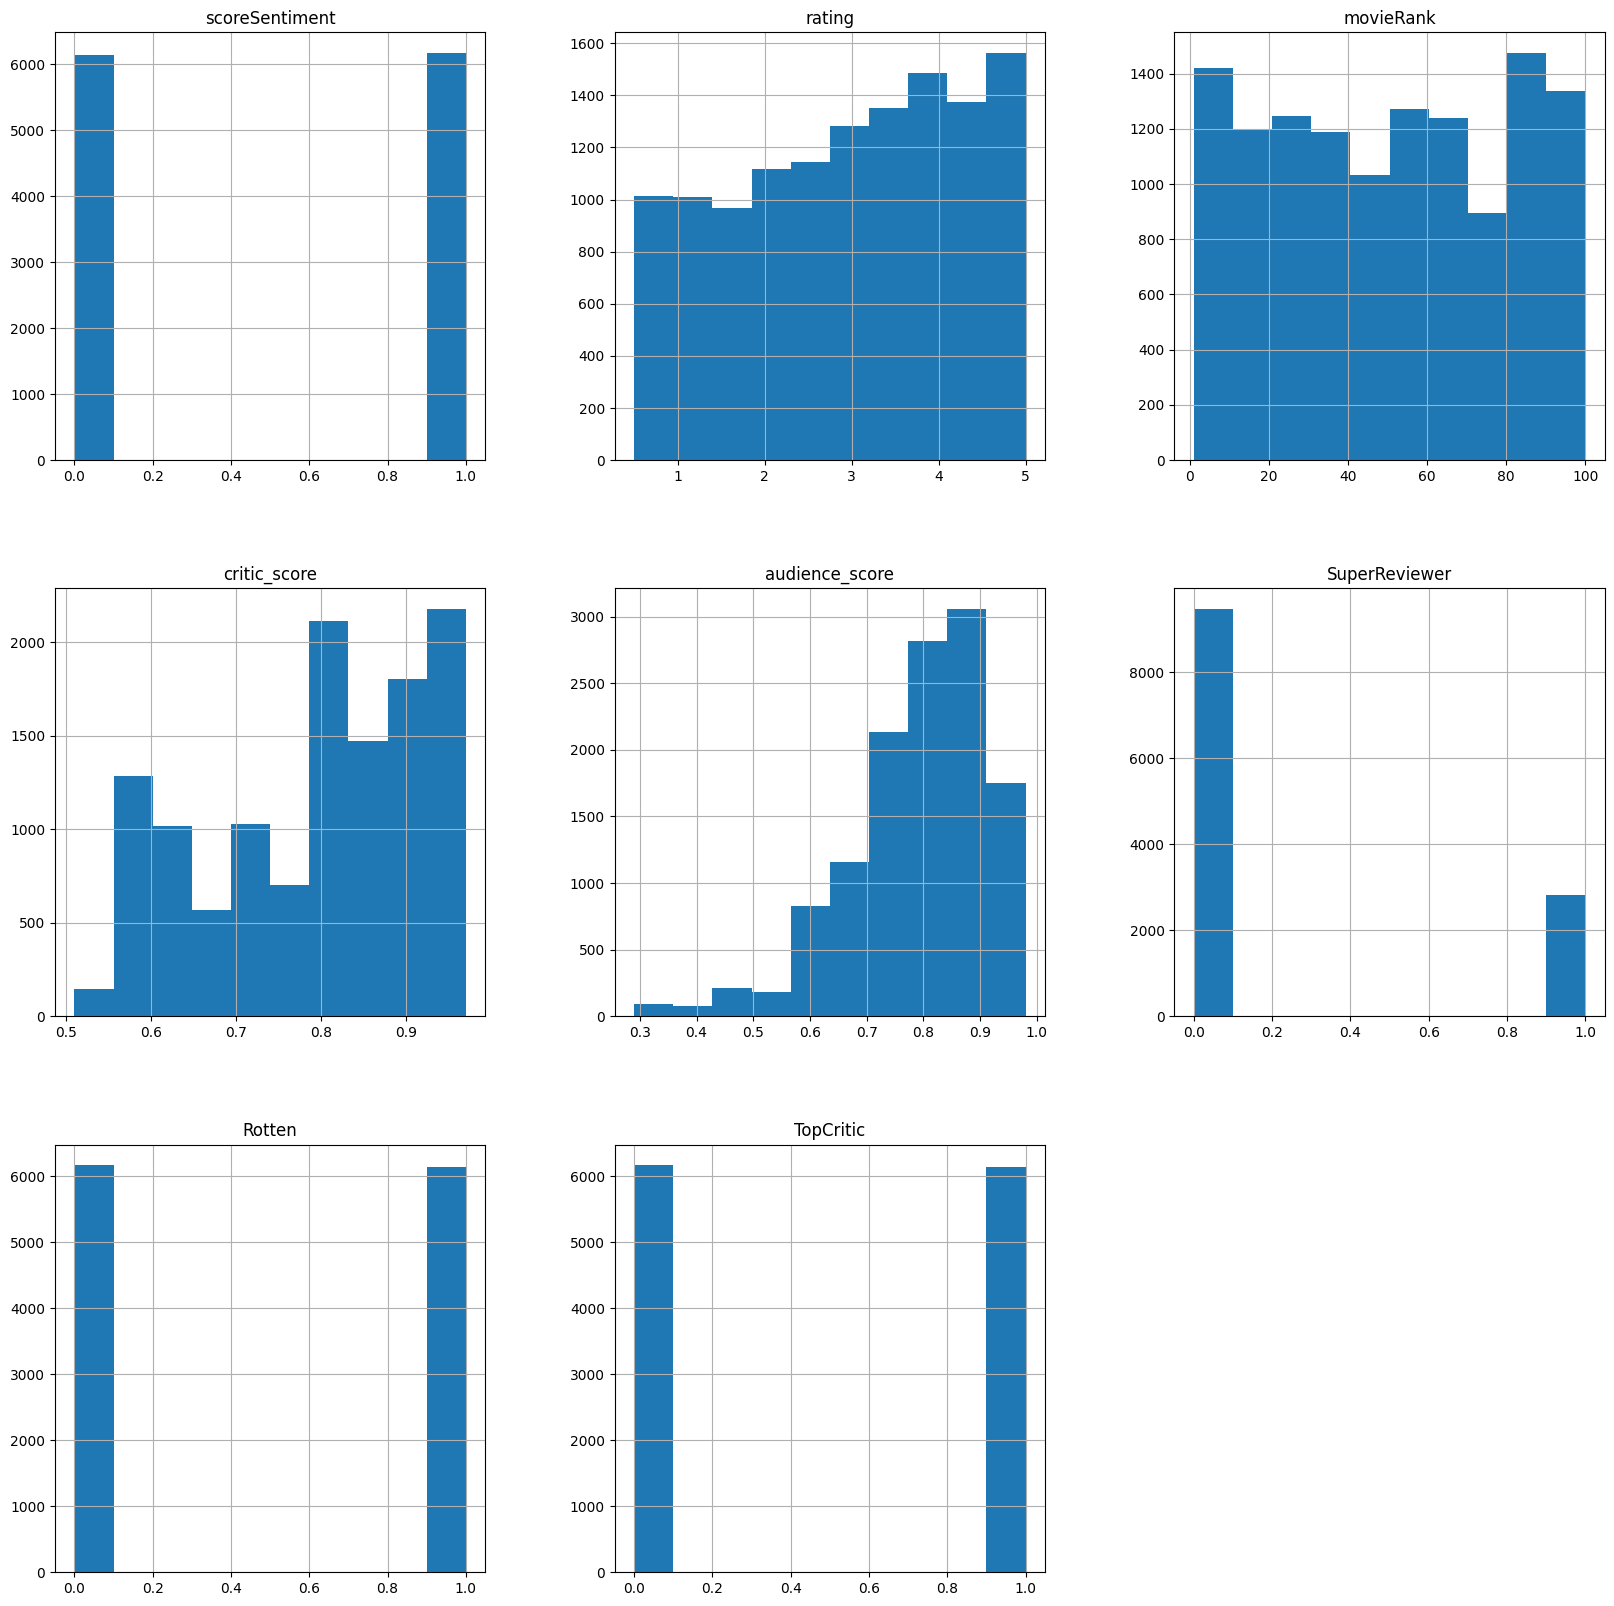

In [44]:
df_r.hist(figsize=(20,20))

Creating a mask for the correlations matrix.

In [45]:
df_corr = df_r.corr()

In [46]:
mask = ~((df_corr > 0.1) | (df_corr< -0.1))

In [27]:
import matplotlib.pyplot as plt

Plotting the matrix.

<Axes: >

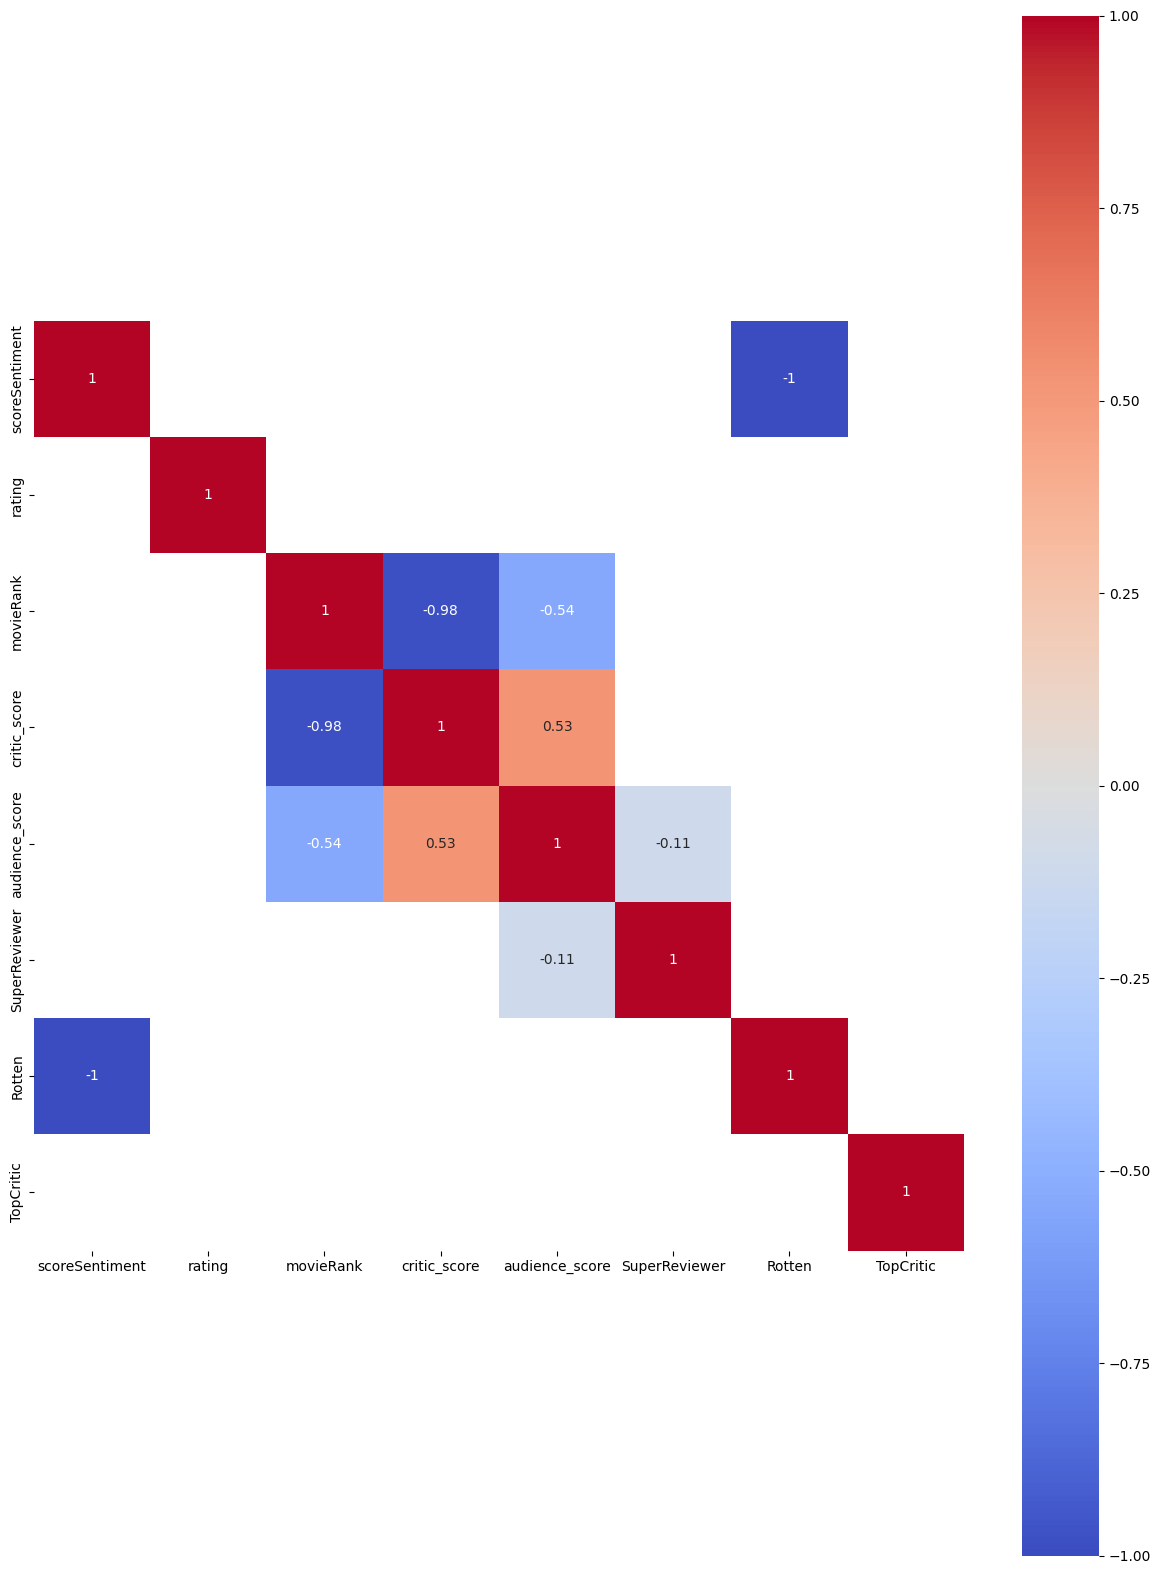

In [47]:
plt.figure(figsize=(15,20))
sns.heatmap(df_corr, annot=True, cmap='coolwarm', square=True, mask=mask)

scoreSentiment, rating, superReviewer, Rotten, TopCritic

The correlation matrix shows only two columns with a strong correlation when compared to the movieRank column.

In [29]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.impute import SimpleImputer

In [29]:
df_reviews.head()

,scoreSentiment,rating,movieRank,critic_score,audience_score,Verified,Spoilers,Profanity,SuperReviewer,Fresh,Rotten,TopCritic
0,1,3.0,3,0.96,0.79,0,1,1,0,1,0,0
1,0,5.0,2,0.97,0.75,0,0,0,0,0,1,0
2,1,1.5,2,0.97,0.75,0,0,0,0,1,0,1
3,0,2.5,81,0.67,0.75,0,0,0,0,0,1,1
4,0,3.5,99,0.56,0.75,0,0,0,1,0,1,1


Including interaction terms to improve the model. 

In [30]:
columns = ['scoreSentiment',	'rating', 'critic_score',	'audience_score',	'Verified',	'Spoilers',	'Profanity',	'SuperReviewer',	'Fresh',	'Rotten',	'TopCritic']

In [31]:
imputer = SimpleImputer(strategy='mean')

In [32]:
df_reviews[columns] = imputer.fit_transform(df_reviews[columns])

In [34]:
poly = PolynomialFeatures()
interaction_terms = poly.fit_transform(df_reviews[columns])

In [35]:
interaction_df = pd.DataFrame(interaction_terms, columns=poly.get_feature_names_out(['scoreSentiment',	'rating', 'critic_score',	'audience_score',	'Verified',	'Spoilers',	'Profanity',	'SuperReviewer',	'Fresh',	'Rotten',	'TopCritic']))

In [36]:
df_combined = pd.concat([df_reviews, interaction_df], axis=1)

In [37]:
df_corr = interaction_df.corr()

<Axes: >

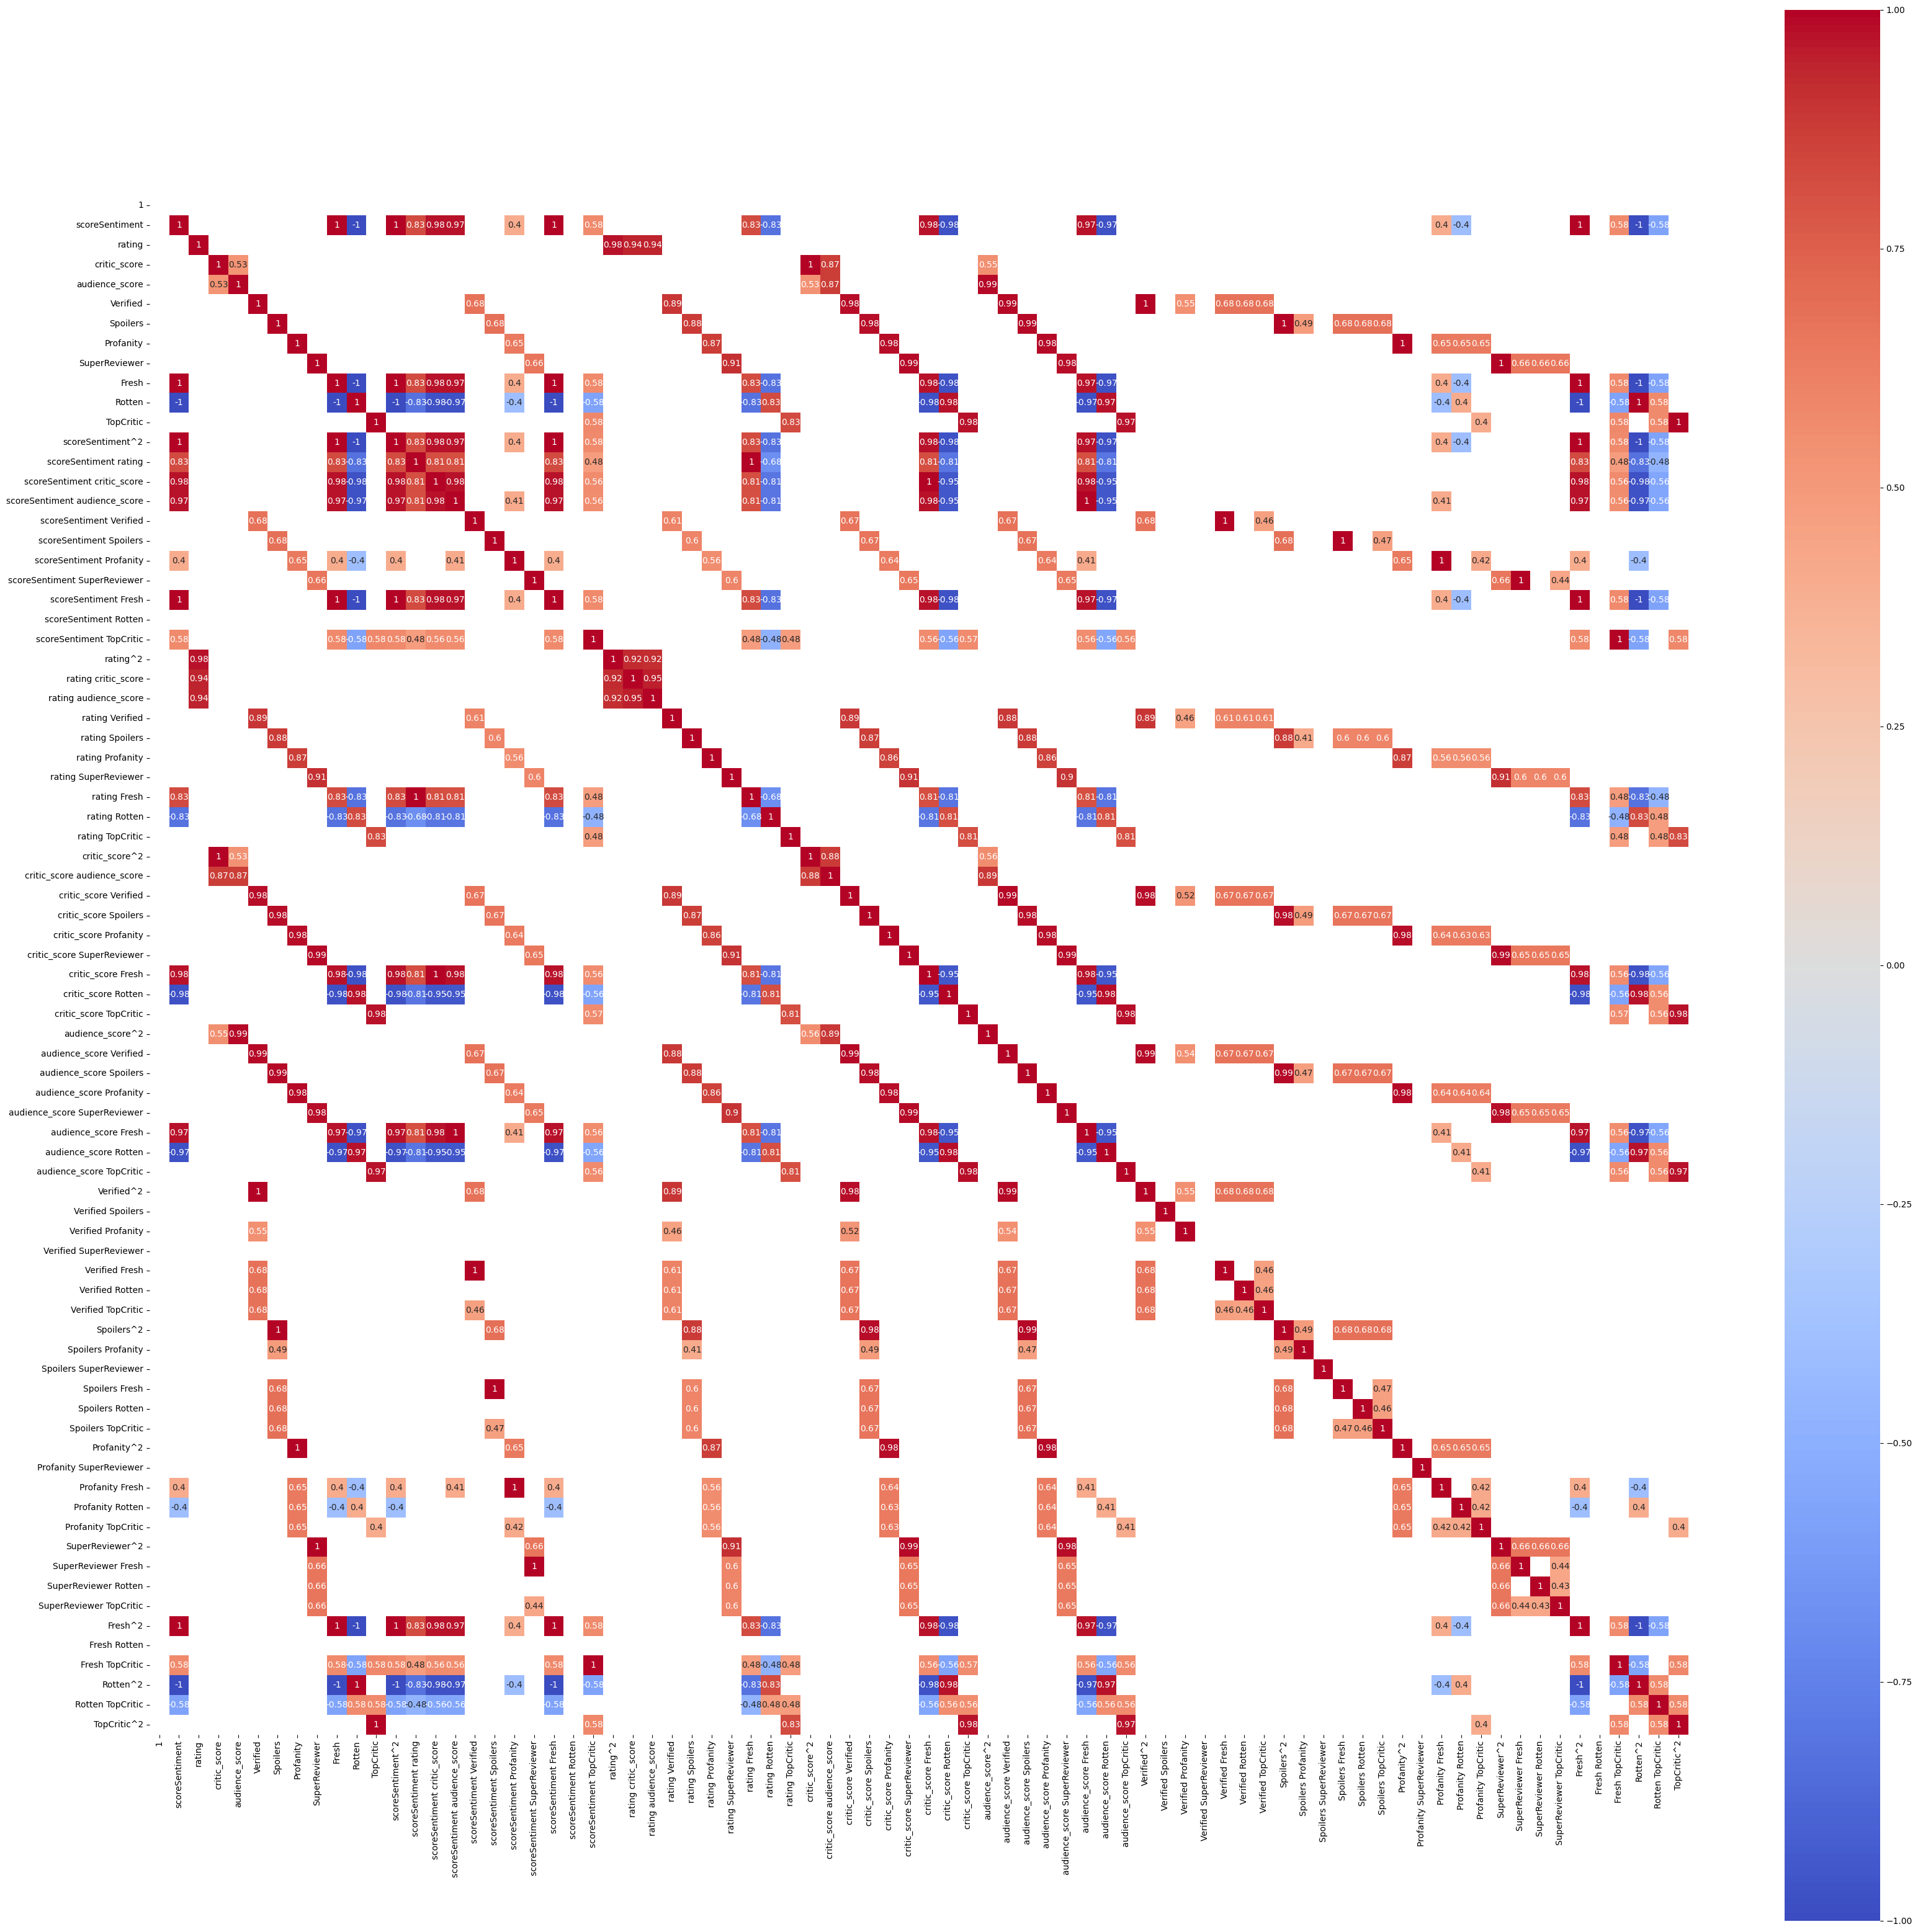

In [40]:
mask = ~((df_corr > 0.4) | (df_corr< -0.4))
plt.figure(figsize=(60,60))
sns.heatmap(df_corr, annot=True, cmap='coolwarm', square=True, mask=mask)

Feature engineering to create new columns. Top Audience Score (above 75%) to be returned as a 1 and anything below that as a 0. Top Critic Score (above 75%) to be returned as a 1 and anything below that as a 0.

In [32]:
df_reviews['AudienceRatedTop'] = [1 if i >= 0.75 else 0 for i in df_reviews['audience_score']]

In [33]:
df_reviews['CriticsRatedTop'] = [1 if i >= 0.75 else 0 for i in df_reviews['critic_score']]

In [34]:
df_reviews.head()

,scoreSentiment,rating,movieRank,critic_score,audience_score,Verified,Spoilers,Profanity,SuperReviewer,Fresh,Rotten,TopCritic,superReviewer_TopCritic,rating_movieRank,AudienceRatedTop,CriticsRatedTop
0,1,3.0,3,0.96,0.79,0,1,1,0,1,0,0,0,9.0,1,1
1,0,5.0,2,0.97,0.75,0,0,0,0,0,1,0,0,10.0,1,1
2,1,1.5,2,0.97,0.75,0,0,0,0,1,0,1,0,3.0,1,1
3,0,2.5,81,0.67,0.75,0,0,0,0,0,1,1,0,202.5,1,0
4,0,3.5,99,0.56,0.75,0,0,0,1,0,1,1,1,346.5,1,0


Dropping the columns that are no longer needed.

In [35]:
df_reviews = df_reviews.drop(columns=['critic_score', 'audience_score'])

In [36]:
df_reviews.head()

,scoreSentiment,rating,movieRank,Verified,Spoilers,Profanity,SuperReviewer,Fresh,Rotten,TopCritic,superReviewer_TopCritic,rating_movieRank,AudienceRatedTop,CriticsRatedTop
0,1,3.0,3,0,1,1,0,1,0,0,0,9.0,1,1
1,0,5.0,2,0,0,0,0,0,1,0,0,10.0,1,1
2,1,1.5,2,0,0,0,0,1,0,1,0,3.0,1,1
3,0,2.5,81,0,0,0,0,0,1,1,0,202.5,1,0
4,0,3.5,99,0,0,0,1,0,1,1,1,346.5,1,0


Some more feature engineering.

In [37]:
def get_rank_category(rank):
    if 0 <= rank <= 10:
        return 1
    elif 10 < rank <= 25:
        return 2
    elif 25 < rank <= 50:
        return 3
    elif 50 < rank <= 90:
        return 4
    else:
        return 5 

df_reviews['rankCategory'] = [get_rank_category(rank) for rank in df_reviews['movieRank']]

In [38]:
df_reviews.head()

,scoreSentiment,rating,movieRank,Verified,Spoilers,Profanity,SuperReviewer,Fresh,Rotten,TopCritic,superReviewer_TopCritic,rating_movieRank,AudienceRatedTop,CriticsRatedTop,rankCategory
0,1,3.0,3,0,1,1,0,1,0,0,0,9.0,1,1,1
1,0,5.0,2,0,0,0,0,0,1,0,0,10.0,1,1,1
2,1,1.5,2,0,0,0,0,1,0,1,0,3.0,1,1,1
3,0,2.5,81,0,0,0,0,0,1,1,0,202.5,1,0,4
4,0,3.5,99,0,0,0,1,0,1,1,1,346.5,1,0,5


In [39]:
df_reviews.corr()

,scoreSentiment,rating,movieRank,Verified,Spoilers,Profanity,SuperReviewer,Fresh,Rotten,TopCritic,superReviewer_TopCritic,rating_movieRank,AudienceRatedTop,CriticsRatedTop,rankCategory
scoreSentiment,1.000000,-0.000542,-0.000061,-0.000939,-0.000852,-0.000693,0.000379,1.000000,-1.000000,0.002852,0.001531,-0.000277,-0.004422,0.002021,0.000221
rating,-0.000542,1.000000,-0.056906,0.059028,-0.009545,0.027135,0.066613,-0.000542,0.000542,0.000542,0.044209,0.559728,0.033787,0.050120,-0.045948
movieRank,-0.000061,-0.056906,1.000000,0.022370,-0.024783,-0.014709,0.024109,-0.000061,0.000061,0.000061,0.015092,0.712388,-0.461007,-0.821019,0.946312
Verified,-0.000939,0.059028,0.022370,1.000000,0.015235,0.046272,-0.224676,-0.000939,0.000939,0.000939,-0.147915,0.041376,0.129191,-0.002672,0.004892
Spoilers,-0.000852,-0.009545,-0.024783,0.015235,1.000000,-0.016095,-0.207716,-0.000852,0.000852,0.000852,-0.136744,-0.024907,0.124308,0.014753,-0.048148
Profanity,-0.000693,0.027135,-0.014709,0.046272,-0.016095,1.000000,-0.293080,-0.000693,0.000693,0.000693,-0.192836,0.007541,0.096008,0.017153,-0.023152
SuperReviewer,0.000379,0.066613,0.024109,-0.224676,-0.207716,-0.293080,1.000000,0.000379,-0.000379,-0.000379,0.658347,0.046734,-0.103288,-0.016093,0.039535
Fresh,1.000000,-0.000542,-0.000061,-0.000939,-0.000852,-0.000693,0.000379,1.000000,-1.000000,0.002852,0.001531,-0.000277,-0.004422,0.002021,0.000221
Rotten,-1.000000,0.000542,0.000061,0.000939,0.000852,0.000693,-0.000379,-1.000000,1.000000,-0.002852,-0.001531,0.000277,0.004422,-0.002021,-0.000221
TopCritic,0.002852,0.000542,0.000061,0.000939,0.000852,0.000693,-0.000379,0.002852,-0.002852,1.000000,0.360415,0.000277,0.004422,-0.002021,-0.000221


In [40]:
df_corr = df_reviews.corr()

In [41]:
mask = ~((df_corr > 0.1) | (df_corr< -0.1))

<Axes: >

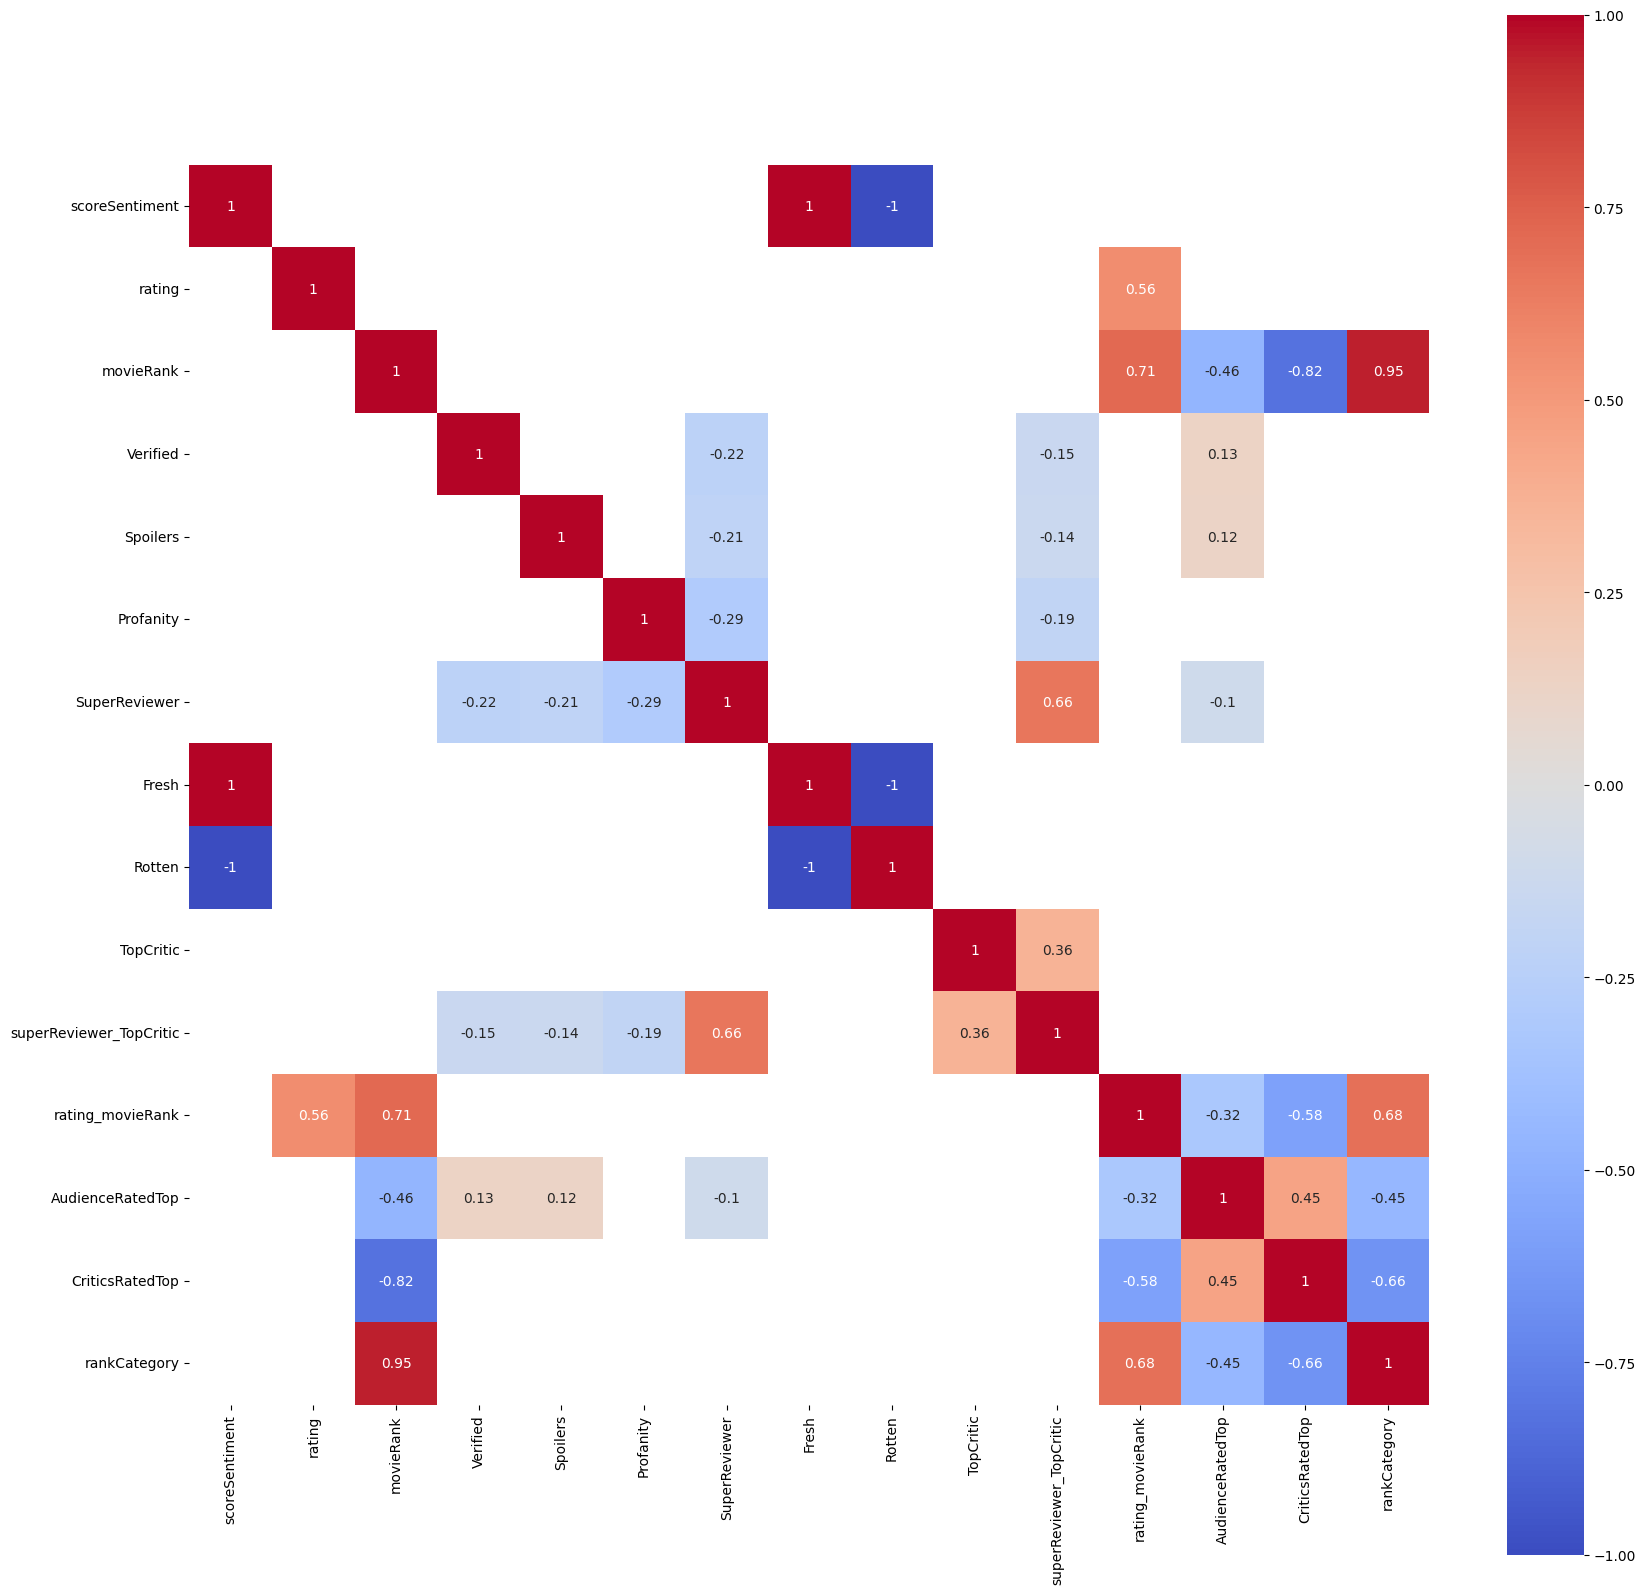

In [42]:
plt.figure(figsize=(20,20))
sns.heatmap(df_corr, annot=True, cmap='coolwarm', square=True, mask=mask)

In [43]:
df_reviews.columns

Index(['scoreSentiment', 'rating', 'movieRank', 'Verified', 'Spoilers',
       'Profanity', 'SuperReviewer', 'Fresh', 'Rotten', 'TopCritic',
       'superReviewer_TopCritic', 'rating_movieRank', 'AudienceRatedTop',
       'CriticsRatedTop', 'rankCategory'],
      dtype='object')

Concerned about potential multicollinearity and may need to drop columns that are highly correlated later

In [44]:
#df_final = df_reviews.drop(columns=['rankCategory', 'CriticsRatedTop', 'rating_movieRank', 'superReviewer_TopCritic',	'AudienceRatedTop'])

In [45]:
df_reviews.head()

,scoreSentiment,rating,movieRank,Verified,Spoilers,Profanity,SuperReviewer,Fresh,Rotten,TopCritic,superReviewer_TopCritic,rating_movieRank,AudienceRatedTop,CriticsRatedTop,rankCategory
0,1,3.0,3,0,1,1,0,1,0,0,0,9.0,1,1,1
1,0,5.0,2,0,0,0,0,0,1,0,0,10.0,1,1,1
2,1,1.5,2,0,0,0,0,1,0,1,0,3.0,1,1,1
3,0,2.5,81,0,0,0,0,0,1,1,0,202.5,1,0,4
4,0,3.5,99,0,0,0,1,0,1,1,1,346.5,1,0,5


In [46]:
df_reviews.columns

Index(['scoreSentiment', 'rating', 'movieRank', 'Verified', 'Spoilers',
       'Profanity', 'SuperReviewer', 'Fresh', 'Rotten', 'TopCritic',
       'superReviewer_TopCritic', 'rating_movieRank', 'AudienceRatedTop',
       'CriticsRatedTop', 'rankCategory'],
      dtype='object')

Feature and target selection

In [47]:
X = df_reviews.drop(columns=['movieRank'])
y = df_reviews['movieRank']

In [48]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [49]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12309 entries, 0 to 12308
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   scoreSentiment           12309 non-null  int64  
 1   rating                   12309 non-null  float64
 2   Verified                 12309 non-null  int64  
 3   Spoilers                 12309 non-null  int64  
 4   Profanity                12309 non-null  int64  
 5   SuperReviewer            12309 non-null  int64  
 6   Fresh                    12309 non-null  int64  
 7   Rotten                   12309 non-null  int64  
 8   TopCritic                12309 non-null  int64  
 9   superReviewer_TopCritic  12309 non-null  int64  
 10  rating_movieRank         12309 non-null  float64
 11  AudienceRatedTop         12309 non-null  int64  
 12  CriticsRatedTop          12309 non-null  int64  
 13  rankCategory             12309 non-null  int64  
dtypes: float64(2), int64(1

Using VIF to check for multicollinearity.

In [50]:
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)

                    feature        VIF
0            scoreSentiment        inf
1                    rating   3.386562
2                  Verified   1.082300
3                  Spoilers   1.070857
4                 Profanity   1.113247
5             SuperReviewer   2.217881
6                     Fresh        inf
7                    Rotten  23.695771
8                 TopCritic   1.298050
9   superReviewer_TopCritic   2.290962
10         rating_movieRank   6.620196
11         AudienceRatedTop   1.385940
12          CriticsRatedTop   2.304735
13             rankCategory   3.856551


c:\Users\aa1\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Dropping columns that are highly correlated.

In [51]:
X = X.drop(columns=['Fresh', 'Rotten', 'rating_movieRank', 'scoreSentiment'])

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Instantiating the linear regression model

In [53]:
l_model = LinearRegression()

In [54]:
X_train.value_counts()

rating  Verified  Spoilers  Profanity  SuperReviewer  TopCritic  superReviewer_TopCritic  AudienceRatedTop  CriticsRatedTop  rankCategory
2.0     0         0         0          0              0          0                        1                 1                3               37
2.5     0         0         0          0              0          0                        1                 1                3               35
4.0     0         0         0          1              1          1                        1                 1                3               35
4.5     0         0         0          0              0          0                        1                 1                3               35
                                                      1          0                        1                 1                3               34
                                                                                                                                             .

In [55]:
y_train.value_counts()

movieRank
61    245
14    227
37    225
86    207
4     194
     ... 
70     55
84     51
53     38
11     27
74     27
Name: count, Length: 100, dtype: int64

In [56]:
from sklearn.preprocessing import StandardScaler

Using standard scaler to scale the data

In [57]:
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

In [58]:
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).flatten()

Fitting and training the model

In [59]:
l_model.fit(X_train_scaled, y_train_scaled)

LinearRegression()

In [61]:
lr_y_pred = l_model.predict(X_test_scaled)

In [62]:
lr_mse = mean_squared_error(y_test, lr_y_pred)
lr_rmse = (mean_squared_error(y_test, lr_y_pred))**0.5
lr_r2 = r2_score(y_test, lr_y_pred)

In [63]:
print(f'Mean Squared Error: {lr_mse}')
print(f'Root Mean Squared Error: {lr_rmse}')
print(f'R2 Score: {lr_r2}')

Mean Squared Error: 3322.920817781062
Root Mean Squared Error: 57.64478135773491
R2 Score: -2.785021900723376


In [64]:
knn = KNeighborsRegressor(n_neighbors=2)
knn.fit(X_train_scaled, y_train_scaled)

KNeighborsRegressor(n_neighbors=2)

In [65]:
knn_y_pred = knn.predict(X_test_scaled)

In [66]:
knn_mse = mean_squared_error(y_test, knn_y_pred)
knn_rmse = (mean_squared_error(y_test, knn_y_pred))**0.5
knn_r2 = r2_score(y_test, knn_y_pred)

In [67]:
print(f'Mean Squared Error: {knn_mse}')
print(f'Root Mean Squared Error: {knn_rmse}')
print(f'R2 Score: {knn_r2}')

Mean Squared Error: 3322.4831340986175
Root Mean Squared Error: 57.6409848467097
R2 Score: -2.7845233506782545


Going to retry the model with less features

In [68]:
X_df = pd.DataFrame(X)
y_series = pd.Series(y)

df = pd.concat([X_df, y_series], axis=1)

In [69]:
df_corr = df.corr()

<Axes: >

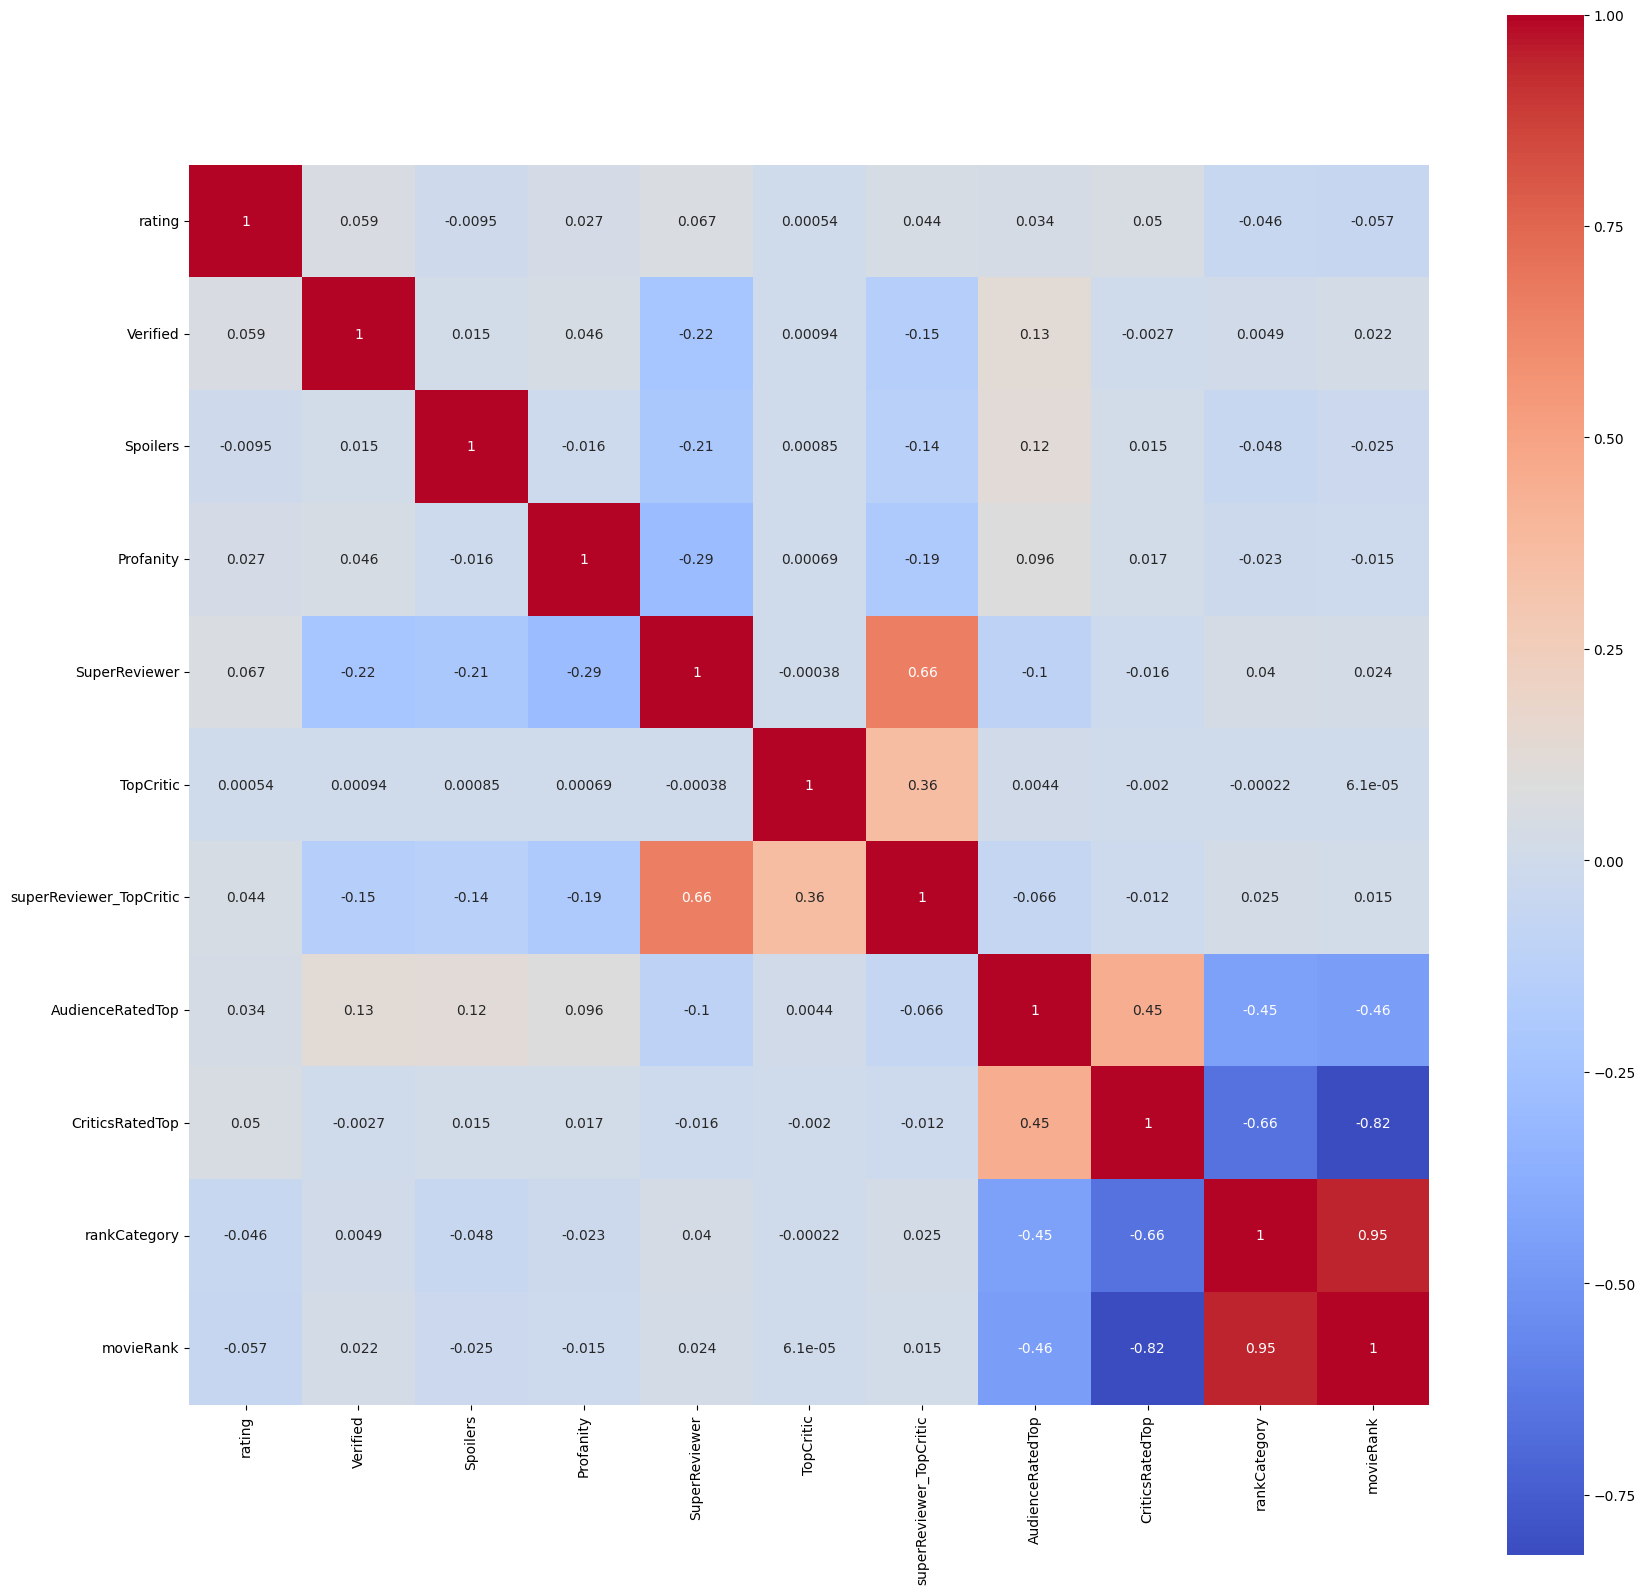

In [70]:
plt.figure(figsize=(20,20))
sns.heatmap(df_corr, annot=True, cmap='coolwarm', square=True)

In [71]:
df.columns

Index(['rating', 'Verified', 'Spoilers', 'Profanity', 'SuperReviewer',
       'TopCritic', 'superReviewer_TopCritic', 'AudienceRatedTop',
       'CriticsRatedTop', 'rankCategory', 'movieRank'],
      dtype='object')

In [72]:
X = df[['AudienceRatedTop', 'CriticsRatedTop']]
y = df['movieRank']

In [79]:
X.head()

,AudienceRatedTop,CriticsRatedTop
0,1,1
1,1,1
2,1,1
3,1,0
4,1,0


In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [74]:
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

In [75]:
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).flatten()

In [76]:
l_model.fit(X_train_scaled, y_train_scaled)

LinearRegression()

In [77]:
lr_mse = mean_squared_error(y_test, lr_y_pred)
lr_rmse = (mean_squared_error(y_test, lr_y_pred))**0.5
lr_r2 = r2_score(y_test, lr_y_pred)

In [78]:
print(f'Mean Squared Error: {lr_mse}')
print(f'Root Mean Squared Error: {lr_rmse}')
print(f'R2 Score: {lr_r2}')

Mean Squared Error: 3322.920817781062
Root Mean Squared Error: 57.64478135773491
R2 Score: -2.785021900723376
